# Titile: Titanic Dataset Preprocessing
### **Author**: Muhammad Usman
### **Date**: 2025-06-28
This notebook demonstrates a step-by-step preprocessing pipeline for the Titanic dataset, preparing it for machine learning tasks.

---

## 1. Introduction
Data preprocessing is a critical step in any data analysis or machine learning project. In this notebook, we will:
- Handle missing values
- Encode categorical variables
- Scale numerical features
- Engineer new features
- Outlier detection and handling
- Split the data into training and testing sets

## 2. Importing Libraries 

In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

In [2]:
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# data set built-in seaborn library
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

## Load the Titanic dataset

In [4]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 3. Exploratory Data Analysis (EDA)
## Data Overview

In [5]:
# Data overview
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 3. Handling Missing Values
Titanic dataset contains missing values in the following columns:
- **Age**: 177 missing values. Impute with the median.
- **Embarked and embark_town**: 2 missing values. Fill with the most frequent value.
- **Deck**: 688 missing values. Drop due to high percentage of missing values.

In [6]:
# Missing values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### Visualize Missing Values Using a Heatmap
- Yellow cells indicate missing values, while purple cells indicate present values.

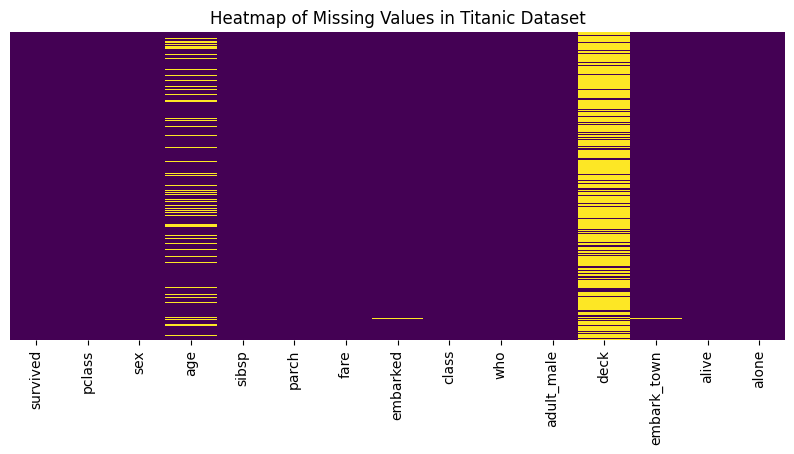

In [7]:
# Visualize missing values using a heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Values in Titanic Dataset')
plt.show()

# Yellow cells indicate missing values, while purple cells indicate present values.

In [8]:
# Handling missing values
df['age'].fillna(df['age'].median(), inplace = True) # age
df['embarked'].fillna(df['embarked'].mode()[0], inplace = True) # embarked
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace = True)# embark_town
df.drop('deck', axis = 1, inplace = True)


In [9]:
# Check missing values
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

## 4. Encoding Categorical Variables
We encode categorical variables as follows:
- **Sex**: Binary encoding (0 = female, 1 = male)
- **Embarked**: One-hot encoding (0 = S, 1 = C, 2 = Q)

In [10]:
# Encode categorical variables
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])

In [11]:
# One-hot encoding for embarked
df = pd.get_dummies(df, columns = ['embarked'], drop_first=True)

In [12]:
print(df.head())

   survived  pclass  sex   age  sibsp  parch     fare  class    who  \
0         0       3    1  22.0      1      0   7.2500  Third    man   
1         1       1    0  38.0      1      0  71.2833  First  woman   
2         1       3    0  26.0      0      0   7.9250  Third  woman   
3         1       1    0  35.0      1      0  53.1000  First  woman   
4         0       3    1  35.0      0      0   8.0500  Third    man   

   adult_male  embark_town alive  alone  embarked_Q  embarked_S  
0        True  Southampton    no  False       False        True  
1       False    Cherbourg   yes  False       False       False  
2       False  Southampton   yes   True       False        True  
3       False  Southampton   yes  False       False        True  
4        True  Southampton    no   True       False        True  


## 5. Feature Engineering
For additional insights, we create new columns.
- **family_size**: Combination of sibsp and parch.

In [13]:
# Feature engineering
df['family_size'] = df['sibsp'] + df['parch']

In [14]:
print(df.head())

   survived  pclass  sex   age  sibsp  parch     fare  class    who  \
0         0       3    1  22.0      1      0   7.2500  Third    man   
1         1       1    0  38.0      1      0  71.2833  First  woman   
2         1       3    0  26.0      0      0   7.9250  Third  woman   
3         1       1    0  35.0      1      0  53.1000  First  woman   
4         0       3    1  35.0      0      0   8.0500  Third    man   

   adult_male  embark_town alive  alone  embarked_Q  embarked_S  family_size  
0        True  Southampton    no  False       False        True            1  
1       False    Cherbourg   yes  False       False       False            1  
2       False  Southampton   yes   True       False        True            0  
3       False  Southampton   yes  False       False        True            1  
4        True  Southampton    no   True       False        True            0  


## 6. Scaling Numerical Features
"Age" and "fare" are scaled using **StandardScaler** to normalize their range.

In [15]:
# Scaling numeric features
scaler = StandardScaler()
df[['age', 'fare']] = scaler.fit_transform(df[['age', 'fare']])

In [16]:
# show normalized data
df[['age', 'fare']].head()

,age,fare
0,-0.565736,-0.502445
1,0.663861,0.786845
2,-0.258337,-0.488854
3,0.433312,0.420730
4,0.433312,-0.486337


## 7. Identify Outliers Using Box Plot

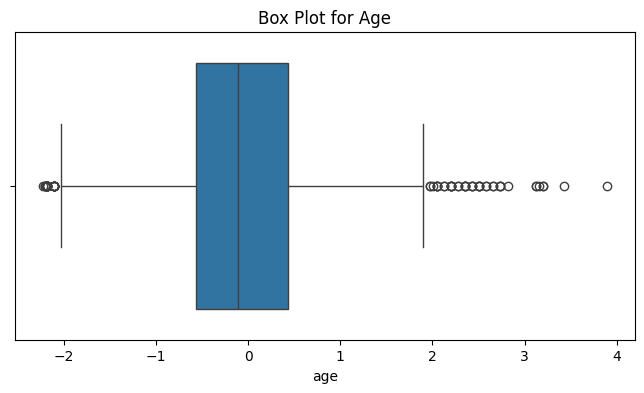

In [17]:
# Boxplot for age
plt.figure(figsize = (8,4))
sns.boxplot(data = df, x = 'age')
plt.title('Box Plot for Age')
plt.show()

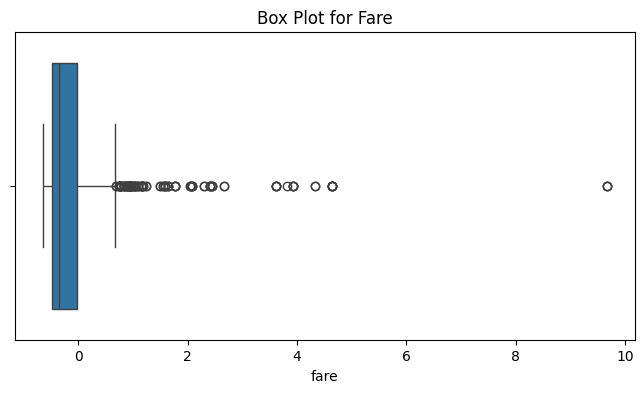

In [18]:
# Boxplot for fare
plt.figure(figsize = (8,4))
sns.boxplot(data = df, x = 'fare')
plt.title('Box Plot for Fare')
plt.show()

## 8. Remove Outliers Using the IQR Method



In [19]:
# Remove outliers using IQR method
for column in ['fare', 'age']:
    Q1 = df[column].quantile(0.25)  # 25th percentile
    Q3 = df[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1                   # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter the data
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

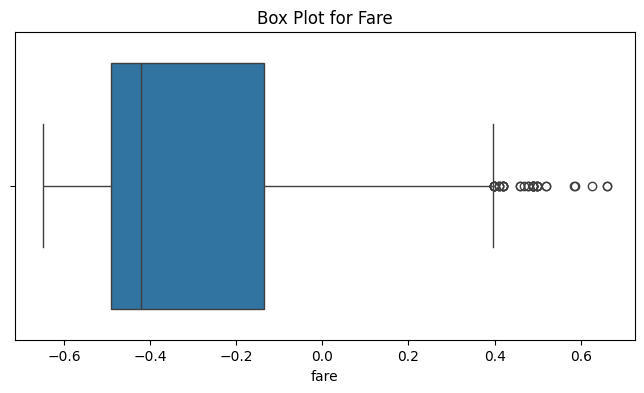

In [20]:
# Boxplot for fare
plt.figure(figsize = (8,4))
sns.boxplot(data = df, x = 'fare')
plt.title('Box Plot for Fare')
plt.show()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 708 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     708 non-null    int64   
 1   pclass       708 non-null    int64   
 2   sex          708 non-null    int64   
 3   age          708 non-null    float64 
 4   sibsp        708 non-null    int64   
 5   parch        708 non-null    int64   
 6   fare         708 non-null    float64 
 7   class        708 non-null    category
 8   who          708 non-null    object  
 9   adult_male   708 non-null    bool    
 10  embark_town  708 non-null    object  
 11  alive        708 non-null    object  
 12  alone        708 non-null    bool    
 13  embarked_Q   708 non-null    bool    
 14  embarked_S   708 non-null    bool    
 15  family_size  708 non-null    int64   
dtypes: bool(4), category(1), float64(2), int64(6), object(3)
memory usage: 70.0+ KB


In [22]:

# Check the new shape of the dataset
print(f"Dataset shape after outlier removal: {df.shape}")

Dataset shape after outlier removal: (708, 16)


In [23]:
df

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,embarked_Q,embarked_S,family_size
0,0,3,1,-0.565736,1,0,-0.502445,Third,man,True,Southampton,no,False,False,True,1
2,1,3,0,-0.258337,0,0,-0.488854,Third,woman,False,Southampton,yes,True,False,True,0
3,1,1,0,0.433312,1,0,0.420730,First,woman,False,Southampton,yes,False,False,True,1
4,0,3,1,0.433312,0,0,-0.486337,Third,man,True,Southampton,no,True,False,True,0
5,0,3,1,-0.104637,0,0,-0.478116,Third,man,True,Queenstown,no,True,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,-0.181487,0,0,-0.386671,Second,man,True,Southampton,no,True,False,True,0
887,1,1,0,-0.796286,0,0,-0.044381,First,woman,False,Southampton,yes,True,False,True,0
888,0,3,0,-0.104637,1,2,-0.176263,Third,woman,False,Southampton,no,False,False,True,3
889,1,1,1,-0.258337,0,0,-0.044381,First,man,True,Cherbourg,yes,True,False,False,0


## 9. Splitting Data into Training and Testing Sets

In [24]:
# Splitting the data
X = df.drop('survived', axis = 1)
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## 10. Summary
The dataset is now preprocessed and ready for machine learning models. Here’s a quick summary of the steps we covered:

- Identified and handled missing values.

- Encoded categorical variables.

- Scaled numerical features.

- Engineered new features.

- Removed outliers.

- Split data into training and testing sets.